# Midterm Exam (part 2) - Computational Physics I

### Date: Friday 18 October 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

## Name: 

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The exam is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems:

## 5. Image processing: identifying sunspots (10 points) 

The purpose of this problem is to isolate and image a sunspot, and then calculate its size.

Sunspots are **dark spots on the Sun's surface that are cooler than the surrounding (brighter) areas due to intense magnetic activity**. They often appear in groups and are indicators of high Solar activity (called Solar maxima, which refer to the periods of peak solar activity during the Sun's 11-year solar cycle). We are currently within a Solar maxima period, which is expected to peak in July 2025. During such periods, sunspots, solar flares, and other solar phenomena are frequent.

### SDO sunspot data: 

The Solar Dynamics Observatory (SDO), launched by NASA in 2010, continuously monitors the Sun, capturing high-resolution images of its atmosphere. Its Atmospheric Imaging Assembly (AIA) provides data in multiple wavelengths, allowing us to study Solar dynamics and sunspot formation. Today's Sun images can be found here: https://suntoday.lmsal.com/suntoday/?suntoday_date=2024-10-18).

Please download the SDO data from: https://github.com/wbandabarragan/physics-teaching-data/tree/main/2D-data/f1700.fits

This file has an image of the Sun at a wavelength of $1700\,\rm Å$, which observes the lower photosphere (i.e. the visible surface of the Sun). It shows the cooler layers of the Sun at temperatures of $5000-6000\,\rm K$). It also highlights bright regions associated with magnetic activity and sunspots, so it is ideal for this exercise.

### Tasks:

(a) Open the FITS file and inspect its content and structure. You should see a header and the data.

(b) Create an I/O python function that reads in the filename and returns the header and the data as objects in a tuple.

(c) Call your I/O function, store the header and data objects, and make a high-quality figure showing the image of the Sun with a colour bar in linear scale. For optimal sunspot visualisation, you will need to fix the limits of the colour bar and choose an adequate colour palette. How many sunspots can you visually spot?

(d) Now you need to isolate a single sunspot. Select one target sunspot and use indexing to zoom into it. Make a high-quality figure showing the subset (zoomed-in) image of the Sun, containing your target sunspot.

(e) Make a 1D histogram of pixel intensity within the subset (zoomed-in) image. Do the sunspots have low or high intensities?

(f) Create a python function that isolates the area covered by the sunspot. Your function should read the subset image and return a cleaned binary image array with ones in the sunspot and zeroes outside.

(g) Call your function and make a high-quality figure showing the binary image of the sunspot with an appropriate colour bar.

(h) Using your binary image, calculate the total area in pixel units covered by the sunspot, and estimate the sunspot radius also in pixel units assuming that its area is circular, i.e. $A_{\rm sunspot}=\pi\,r_{\rm sunspot}^2$.

(i) Now you need to calculate the sunspot radius in physical units ($\rm km$). To do this, you first need to read from the FITS file the header information on the angular size of a pixel in the image (called "CDELT1" in units of $\rm arcsec$). Use the header object returned in (c) and isolate the value of "CDELT1" from it. Then, convert it to a physical size (in $\rm km$) using the Earth-Sun distance of $1.496\times 10^8\,\rm km$ and trigonometry.

(j) Use the calculated value of "CDELT1" (in $\rm km$) to estimate the sunspot radius in $\rm km$. Based on your results, are sunspots larger or smaller than the Earth? For reference, the Earth radius is $6.37\times 10^3\,\rm km$.

In [1]:
#import libraries:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
!ls


f1700.fits  midterm-exam-p2.ipynb


In [3]:
gal1 =  fits.open("f1700.fits")
print(type(gal1))

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [4]:
#Look at the header

hed_gal1 = gal1[0].header
print(hed_gal1)

keys_gal1 = gal1[0].header.keys
data_gal1 = gal1[0].data
# print(data_gal1)
# print(keys_gal1)

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [1]:
#Look at the header

hed_gal1 = gal1[1].header
print(hed_gal1)

keys_gal1 = gal1[1].header.keys
data_gal1 = gal1[1].data
# print(data_gal1)
# print(keys_gal1)

NameError: name 'gal1' is not defined

#### def IOfun(filename):
    #Look at the header
    hed_filename = filename[1].header
    
    #Look at the keys
    keys_filename = filename[1].header.keys
    #Look at the data
    data_filename = filename[1].data


    return hed_filename, data_filename

In [7]:
filename = fits.open("f1700.fits")
hed, data = IOfun(filename)

In [8]:
print(type(data), data.shape)
#Get data into an image

# image_gal1 = gal1[0].data[0,0,:,:]

# print(image_gal1.shape)


<class 'numpy.ndarray'> (4096, 4096)


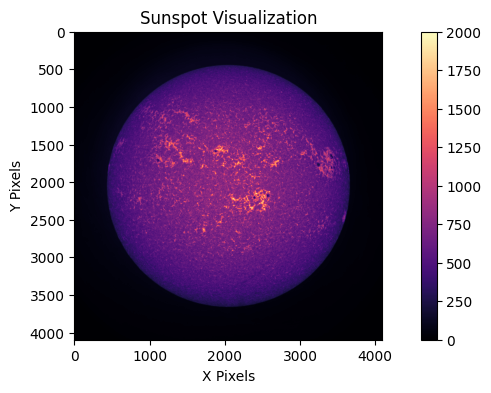

In [9]:

plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(data, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

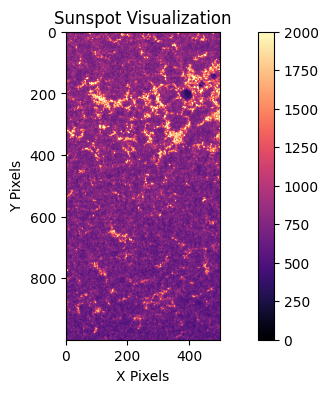

In [10]:
#Apreciate where is the sunspot
#define a interest region:
x_pix=(2000,3000)
y_pix=(2000,2500)
sunspot=data[2000:3000,2000:2500]
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(sunspot, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

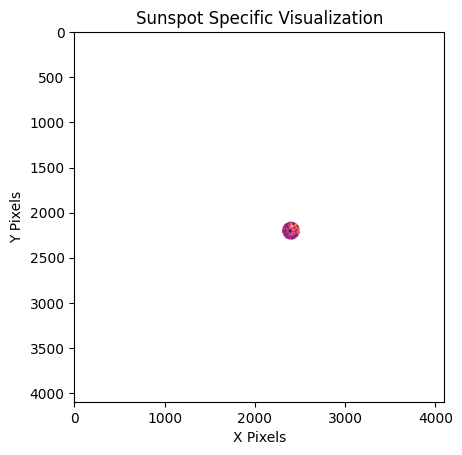

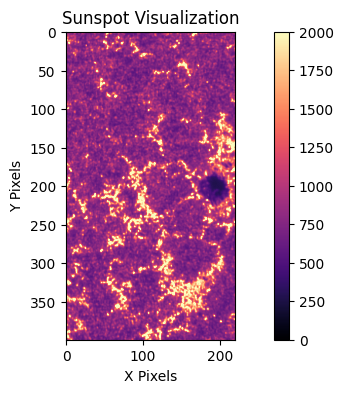

In [26]:
fig, ax = plt.subplots()

im = ax.imshow(data,cmap="magma", clim=(0,2000))
plt.title('Sunspot Specific Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

patch = patches.Circle((2400, 2200), radius=100, transform=ax.transData) #I can use the patch to decide where will be the star...(200,100)

im.set_clip_path(patch)

plt.show()
#define a interest region:
x_pix=(2000,3000)
y_pix=(2000,2500)
sunspot=data[2000:2400,2200:2420]
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(sunspot, cmap="magma", clim=(0,2000) )
plt.title('Sunspot Visualization')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

In [27]:
#Flatten the 2D image
sunspot_zoomed=sunspot
sunspot_zoomed_1d = sunspot_zoomed.reshape((sunspot_zoomed.size),1)

print(sunspot_zoomed.shape, sunspot_zoomed_1d.shape)
# data_1d =  data.reshape((data.size),1)

# print(data.shape, data_1d.shape)

(400, 220) (88000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

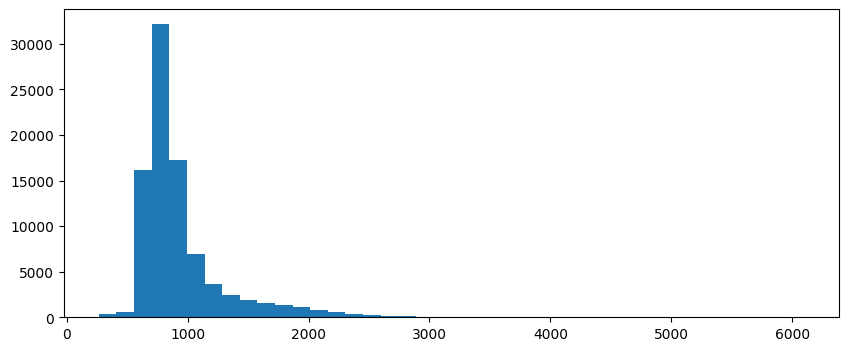

In [28]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)

plt.hist(sunspot_zoomed_1d, bins=40)
# plt.ylim(0, 2e6)
# plt.xlim(0,2000)
plt.show


The sunspots have low intensities.

In [29]:
#See min/max

print("For first image: gal1 min is: ",np.min(sunspot_zoomed_1d)," max is:", np.max(sunspot_zoomed_1d))


For first image: gal1 min is:  265  max is: 6093


<function matplotlib.pyplot.show(close=None, block=None)>

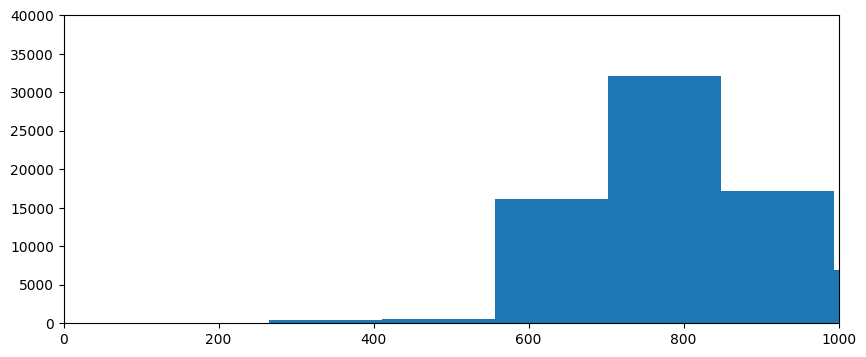

In [30]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)

plt.hist(sunspot_zoomed_1d, bins=40)
plt.ylim(0, 40000)
plt.xlim(0,1000)
plt.show


In [31]:
#Usea thresholding:
#Here we have a 1D clean space:
clean_sunspots = np.where(sunspot_zoomed_1d<500., np.nan, sunspot_zoomed_1d) #conditional, replace with, if not use...
print(clean_sunspots.shape)
clean_sunspots_2d = clean_sunspots.reshape(sunspot.shape)
print(clean_sunspots_2d.shape)



(88000, 1)
(400, 220)


<function matplotlib.pyplot.show(close=None, block=None)>

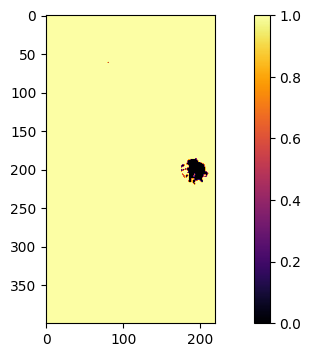

In [33]:
bin_clean= np.where(clean_sunspots_2d>0,1.,0.)
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(bin_clean, cmap="inferno" )
plt.colorbar()
plt.show

In [ ]:
bin_clean= np.where(clean_new_2d>0,1.,0.)
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(bin_clean, cmap="inferno" )
plt.colorbar()
plt.show

In [32]:
#Usea thresholding:
#Here we have a 1D clean space:
clean_test1_1d = np.where(data_1d<10., np.nan, data_1d) #conditional, replace with, if not use...
print(clean_test1_1d.shape)
clean_test1_2d = clean_test1_1d.reshape(data.shape)
print(clean_test1_2d.shape)



NameError: name 'data_1d' is not defined

In [25]:
clean_new= np.where(data_1d<1250, np.nan, data_1d)
clean_new_2d = clean_new.reshape(data.shape)
print(clean_new.shape)

NameError: name 'data_1d' is not defined

In [ ]:
pos=()

In [ ]:
#Use tresholding

bin_gal1_2d= np.where(clean_test1_2d>0., 1., 0.)
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
plt.imshow(bin_gal1_2d, cmap="inferno" )
plt.colorbar()
plt.show

In [ ]:
plt.figure(figsize=(15,8))
# plt.subplot(1,2,1)
plt.hist(data_1d,bins=40, alpha= 0.8)
plt.hist(clean_test1_1d,bins=40, alpha= 0.6)
plt.xlabel("I")
plt.ylabel(" N")
plt.ylim(0,30000)